<img src="https://pmarote.net/tcc/icmc_logo.png"  width="192px" align="right">
<p style="text-align: center; font-size: 200%; font-weight: bold; margin-top: 10px;"><b>UNIVERSIDADE DE SÃO PAULO</b></a></p>
<p style="text-align: center; font-size: 150%; font-weight: bold; margin-top: 10px;">Instituto de Ciências Matemáticas e de Computação</a></p><br>

---
### <div style="text-align: center"><font color="navy">Uso de técnicas de processamento de linguagem natural:<br><br>Aplicação em Decisões do Contencioso Administrativo Fiscal na Secretaria da Fazenda do Estado de São Paulo.</font></div>
### <div style="text-align: left"><font color= #333>Paulo Ricardo dos Santos Olim Marote<br><br>Trabalho de Conclusão de Curso - MBA em Ciência de Dados (CEMEAI)</font></div>
- **Parte III - Aprendizado de Máquina (Machine Learning)**
<p style="text-align: right; font-size: 100%; opacity: 0.8; margin-top: 0px;">USP - São Carlos - 2023</p>

## 🚴 Carregamento de Bibliotecas Auxiliares e Bancos de Dados já criados e processados em tcc.ipynb
- Antes de iniciar, é necessário baixar as bibliotecas necessárias, desenvolvidas para este TCC e gravar em /content/core
- Esta biblioteca encontra-se no github do autor, na pasta /core, no link https://github.com/pmarote/tcc
- Adicionalmente, são carregados em /content/var/ os bancos de dados já criados e processados anteriormente no primeiro notebook de nome 'tcc.ipynb', para continuação neste notebook, bem como os arquivos .txt das decisões

In [1]:
import os

if not os.path.exists("/content/src/"):
    print('- Carregando o código fonte disponível no github para /content/src/')
    !mkdir -p /content/src/
    !git clone -q https://github.com/pmarote/tcc.git /content/src/tcc
else:
    print('- Código fonte de github já se encontra carregada em /content/src/')

if not os.path.exists("/content/core/"):
    print('- Criando pasta /content/core/')
    !mkdir -p /content/core/
    print('- Copiando pasta /content/src/tcc/core/ para /content/core/')
    !cp -r /content/src/tcc/core/ /content/
else:
    print('- Pasta /content/core/ já se encontra carregada')

if not os.path.exists("/content/var/"):
    print('\n- Criando a pasta /content/var/ para armazenar todos os dados')
    !mkdir -p /content/var/
else:
    print('- Pasta /content/var/ já se encontra criada')

if not os.path.exists("/content/var/tcc.db"):
    print('\n- Carregando os bancos de dados já criados e processados, em /content/var/, de link público do google drive do autor')
    !gdown 1jsgZvjzrVZU91LnVif6aMqG2_wurlKt9
    print("- Arquivos de dados 'var_www.zip' baixado com sucesso a partir de link público do google drive")
    print("- Descompactando o conteúdo para a pasta /content/var/ . Aguarde a execução completa.")
    !unzip -q /content/var_tcc.db.zip -d /content/var/
    !rm /content/var_tcc.db.zip
    print('\n- Carregando os arquivos .txt já processados, em /content/var/txt/, de link público do google drive do autor')
    !gdown 1zbjMzu7rjDYAvxakikeeietyI_-lCDDv
    print("- Arquivos de dados 'var_txt.zip' baixado com sucesso a partir de link público do google drive")
    print("- Descompactando o conteúdo para a pasta /content/var/txt/ . Aguarde a execução completa.")
    !unzip -q /content/var_txt.zip -d /content/var/
    !rm /content/var_txt.zip
    print('\n- Finalizado!')
else:
    print('- A pasta /content/var/ com os bancos de dados já criados e processados anteriormente já se encontra criada e carregada')

- Carregando o código fonte disponível no github para /content/src/
- Criando pasta /content/core/
- Copiando pasta /content/src/tcc/core/ para /content/core/

- Criando a pasta /content/var/ para armazenar todos os dados

- Carregando os bancos de dados já criados e processados, em /content/var/, de link público do google drive do autor
Downloading...
From: https://drive.google.com/uc?id=1jsgZvjzrVZU91LnVif6aMqG2_wurlKt9
To: /content/var_tcc.db.zip
100% 4.88M/4.88M [00:00<00:00, 119MB/s]
- Arquivos de dados 'var_www.zip' baixado com sucesso a partir de link público do google drive
- Descompactando o conteúdo para a pasta /content/var/ . Aguarde a execução completa.

- Carregando os arquivos .txt já processados, em /content/var/txt/, de link público do google drive do autor
Downloading...
From: https://drive.google.com/uc?id=1zbjMzu7rjDYAvxakikeeietyI_-lCDDv
To: /content/var_txt.zip
100% 26.2M/26.2M [00:00<00:00, 69.2MB/s]
- Arquivos de dados 'var_txt.zip' baixado com sucesso a partir 

## 🔛 Importações e Inicialização
  - código inicial, carregando as bibliotecas necessárias
  - aqui também são definidas algumas funções 'helpers' para utilização nos códigos, como de formatação de números para português-Brasil

In [2]:
import os
import ipywidgets as widgets
import pandas as pd
import numpy as np
from IPython.display import display, HTML

import core  # apenas insere o diretório ./core em sys.path
from Config import Config
from Db import Db
config = Config.getConfigs()
db = Db(config['VAR_DIR'])
print("config = ", config)

# duas funções para dar uma melhor formatação em português
def int_f(val):
    return "{:,}".format(val).replace(',','.')
def two_dec_f(val):
    return "{:,.2f}".format(val).replace(',','#').replace('.',',').replace('#','.')
# styler em português para pandas
def df_style(styler):
    styler.format(lambda v: f'{v:,.2f}'.replace(".", "#").
              replace(",", ".").replace("#", ",") if isinstance(v, float) else v)
    styler.applymap(lambda v: 'color:red;' if not isinstance(v, str) and v < 0 else None)
    styler.applymap(lambda v: 'opacity: 80%;'
                    if not isinstance(v, str) and abs(v) < 10000 else None)
    return styler


abrindo banco de dados /content/var/tcc.db
config =  {'SRC_DIR': '/content', 'VAR_DIR': '/content/var', 'CWEB_DIR': '/content/var/www'}


## ✔ Recuperando os dataframes de tcc.db
- O trabalho de aprendizado de máquina será efetuado a partir dos dados extraídos, selecionados e processados anteriormente no primeiro notebook, de nome 'tcc.ipynb'
- Assim, a necessidade de leitura do banco de dados SQLite de nome 'tcc.db' e importação dos dataframes a partir do SQLite

In [3]:
df_aiim = pd.read_sql_query('SELECT * FROM aiim', db.conn)
df_aiim.set_index('numero', inplace=True)
df_aiim_mov = pd.read_sql_query('SELECT * FROM aiim_mov', db.conn)
df_aiim_mov.set_index('numero', inplace=True)
df_aiim_decis = pd.read_sql_query('SELECT * FROM aiim_decis', db.conn)
df_aiim_decis.set_index('numero', inplace=True)
df_dec = pd.read_sql_query('SELECT * FROM df_dec', db.conn)
df_dpi = pd.read_sql_query('SELECT * FROM df_dpi', db.conn)
df_dpi.set_index('numero', inplace=True)
df_distr_julg = pd.read_sql_query('SELECT * FROM df_distr_julg', db.conn)
df_detec_ementas = pd.read_sql_query('SELECT * FROM df_detec_ementas', db.conn)
df_detec_ementas.set_index('numero', inplace=True)
df_ementas = pd.read_sql_query('SELECT * FROM df_ementas', db.conn)
df_ementas.set_index('numero', inplace=True)
df_ementas_balanc = pd.read_sql_query('SELECT * FROM df_ementas_balanc', db.conn)
df_ementas_balanc.set_index('numero', inplace=True)

display(HTML("<h3>Dataframes carregados com sucesso do arquivo SQLite 'tcc.db'"
             + f" na pasta {config['VAR_DIR']}</h3>"))


## 🔠 WordClouds
  - Início de utilização de PLN com a biblioteca spaCy
  - Para melhor visualização dos WordClouds, foi criada a coluna 'ementa_no_sw_p', onde foram removidas <i>stop words</i>, ou seja,  palavras como artigos, preposições e conjunções, que geralmente não contêm informações significativas por si só, bem como foram removidas pontuações, como . , ( ) etc
  - Em seguida, da coluna acima, foi criada a coluna 'ementa_lematizada', através de lematização (<i>lemmatization</i>), um processo que reduz as palavras à sua forma base ou de dicionário, considerando o contexto gramatical (por exemplo, "correndo" se torna "correr"). Observa-se que o spaCy, diferentemente de outras bibliotecas de NLP como NLTK, não inclui um <i>stemmer</i> por padrão, mas os processos são semelhantes.
  - Por fim, a partir da coluna 'ementa_no_sw_p' foi criada a coluna 'ementa_no_sw_p_a', onde foi retirada também a acentuação. Tal medida foi efetuada em nova rodada de <i>CRISP</i> porque foram detectadas algumas inconsistências de digitação na origem, como por exemplo, 'crédito' e 'credito'
  - Gerados 4 tipos, de acordo com a combinação das variáveis resposta (<i>targets</i>) (colunas 'imposto' e 'julgado'):
    - ICMS, MANTIDOS e CANCELADOS
    - ITCMD, MANTIDOS e CANCELADOS

In [5]:
%%capture
# Neste TCC, utilizaremos spaCy para PLN
# pt_core_news_sm não está disponível nativamente no GoogleColab e, assim, na primeira utilização, necessário executar este código
!pip install spacy
!python -m spacy download pt_core_news_sm
# unidecode é aqui usado basicamente para converter caracteres acentuados para não acentuados
# não está disponível nativamente no GoogleColab e, assim, na primeira utilização, necessário executar este código
!pip install unidecode
print('spaCy e unidecode instalados com sucesso')

In [6]:
import string
import spacy
from unidecode import unidecode

# Carregar o modelo de linguagem português
pln = spacy.load('pt_core_news_sm')
# Obter a lista de stop words
stop_words = pln.Defaults.stop_words

def remove_stop_words_pontuacao(texto):
    # Processar o texto com o spaCy
    doc = pln(texto)
    # Filtrar as palavras que não são stop words e não são pontuações e unir novamente em uma string
    texto_no_sw_p = ' '.join([token.text.lower() for token in doc if token.text.lower() not in stop_words and token.text not in string.punctuation])
    return texto_no_sw_p

def lematiza_texto(texto):
    # Processar o texto com o spaCy
    doc = pln(texto)
    # Lematizar cada token e unir novamente em uma string
    return ' '.join([token.lemma_ for token in doc])

def remove_acentuacao(texto):
    return unidecode(texto).lower()

# Aplicar a função à coluna 'ementa' e criar uma nova coluna com os textos filtrados
df_ementas['ementa_no_sw_p'] = df_ementas['ementa'].apply(remove_stop_words_pontuacao)
df_ementas_balanc['ementa_no_sw_p'] = df_ementas_balanc['ementa'].apply(remove_stop_words_pontuacao)
# Aplicar a função à coluna 'ementa_filtrada' e criar uma nova coluna com os textos lematizados
df_ementas['ementa_lematizada'] = df_ementas['ementa_no_sw_p'].apply(lematiza_texto)
df_ementas_balanc['ementa_lematizada'] = df_ementas_balanc['ementa_no_sw_p'].apply(lematiza_texto)
# Remover a acentuação partindo de 'ementa_no_sw_p' inserindo na coluna 'ementa_no_sw_p_a'
df_ementas['ementa_no_sw_p_a'] = df_ementas['ementa_no_sw_p'].apply(remove_acentuacao)
df_ementas_balanc['ementa_no_sw_p_a'] = df_ementas_balanc['ementa_no_sw_p'].apply(remove_acentuacao)

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def gera_wordcloud(df, titulo, lematizado=False):
    # Converte as ementas filtradas em uma única string
    if lematizado:
        texto = " ".join(df['ementa_lematizada'])
    else:
        texto = " ".join(df['ementa_no_sw_p_a'])
    wordcloud = WordCloud(background_color='white').generate(texto)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title((titulo + ' - Lematizado') if lematizado else titulo)
    plt.axis('off')
    plt.show()

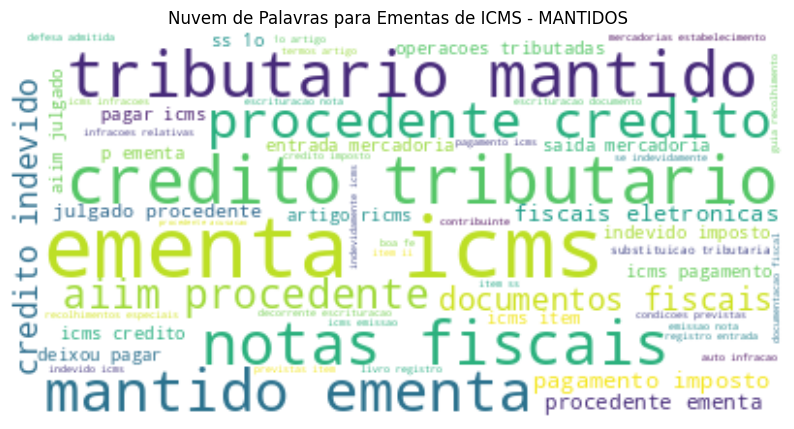

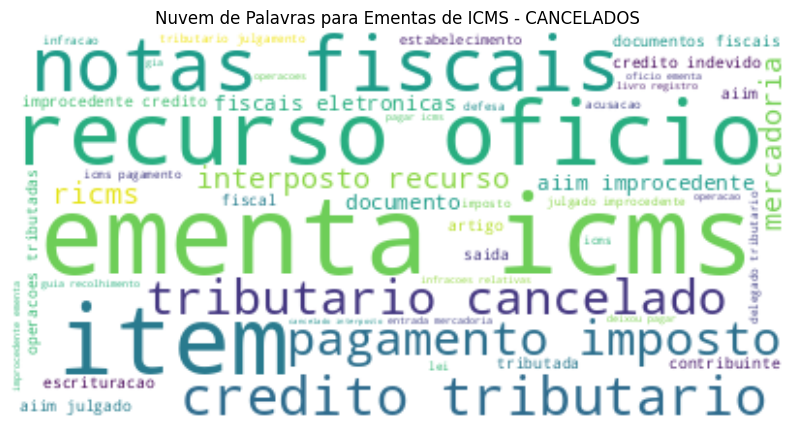

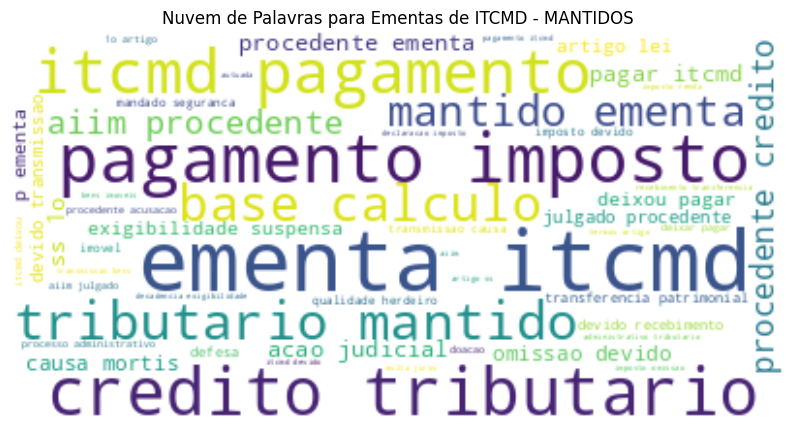

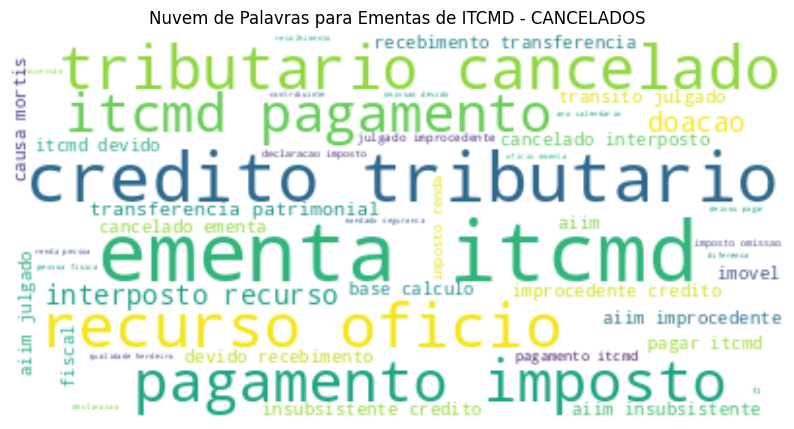

In [8]:
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ICMS') & (df_ementas['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ICMS - MANTIDOS', lematizado=False)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ICMS') & (df_ementas['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ICMS - CANCELADOS', lematizado=False)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ITCMD') & (df_ementas['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ITCMD - MANTIDOS', lematizado=False)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ITCMD') & (df_ementas['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ITCMD - CANCELADOS', lematizado=False)

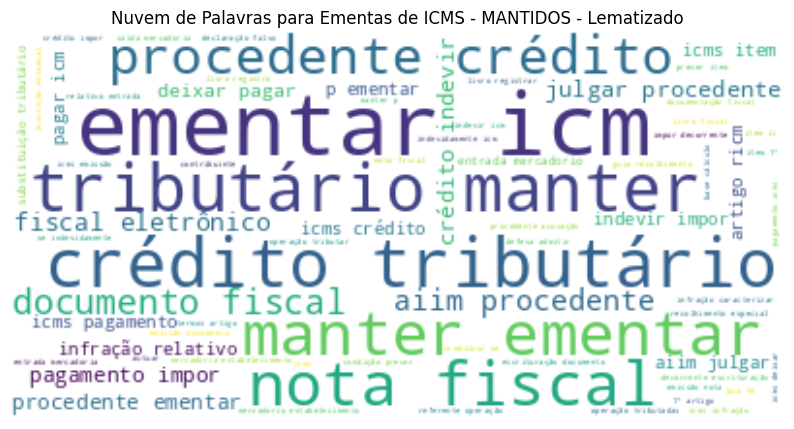

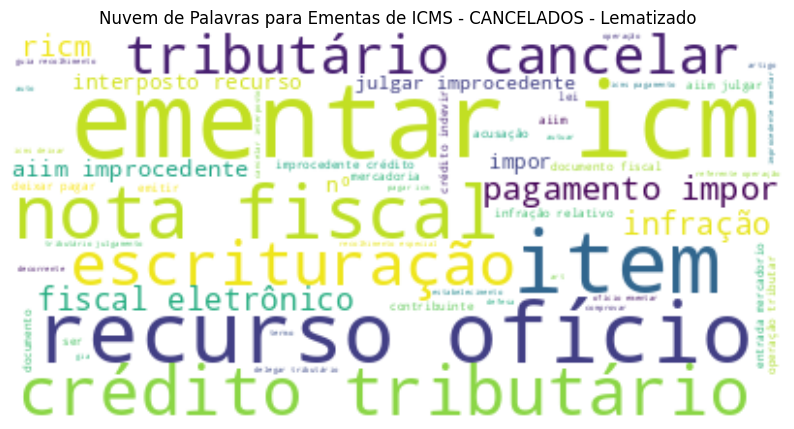

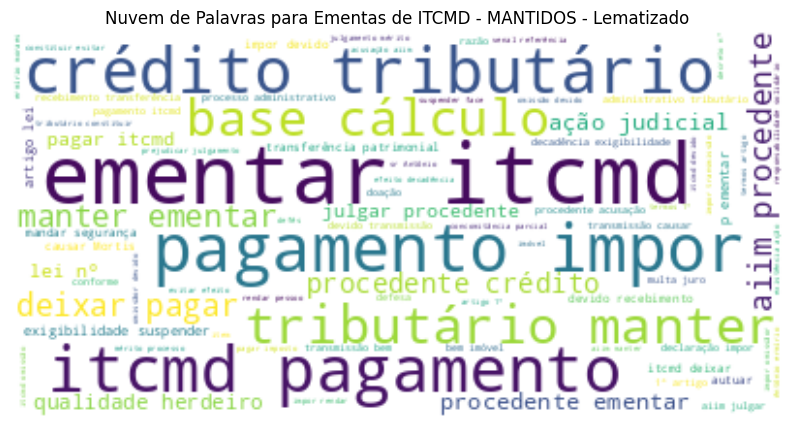

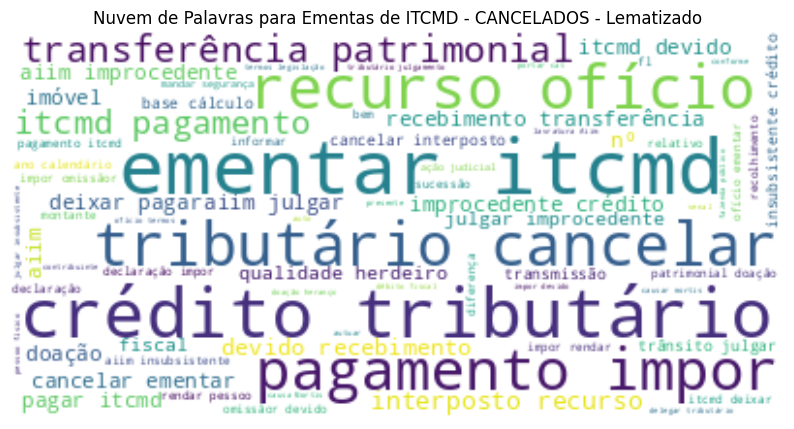

In [9]:
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ICMS') & (df_ementas['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ICMS - MANTIDOS', lematizado=True)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ICMS') & (df_ementas['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ICMS - CANCELADOS', lematizado=True)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ITCMD') & (df_ementas['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ITCMD - MANTIDOS', lematizado=True)
gera_wordcloud(df_ementas[(df_ementas['imposto'] == 'ITCMD') & (df_ementas['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ITCMD - CANCELADOS', lematizado=True)

## 🔠 Nuvens de Palavras (<i>WordClouds</i>) - Algumas conclusões
  - Nas primeiras 4 nuvens de palavras, foram utilizadas as mesmas sem acentuação, porque há alguns erros de digitação na origem, como já explicado (ex: 'crédito' e 'credito')
  - No grupo seguinte, de 4 nuvens de palavras, foi mantida a acentuação, mas a nuvem foi elaborada com as palavras lematizadas
  - A princípio, no exemplo acima a lematização para nuvem de palavras não se mostrou útil. Esperava-se uma maior concentração de palavras mais frequentes, mas neste caso prático incorreu em uma nuvem pouco organizada, em razão de misturas na redução das palavras à sua raiz, ou forma básica.
  - Por fim, abaixo, foram geradas novamente nuvens de palavras, mas para o dataframe balanceado de ementas (df_ementas_balanc), sem lematização. Observa-se razoável diferença em relação ao não balanceado.



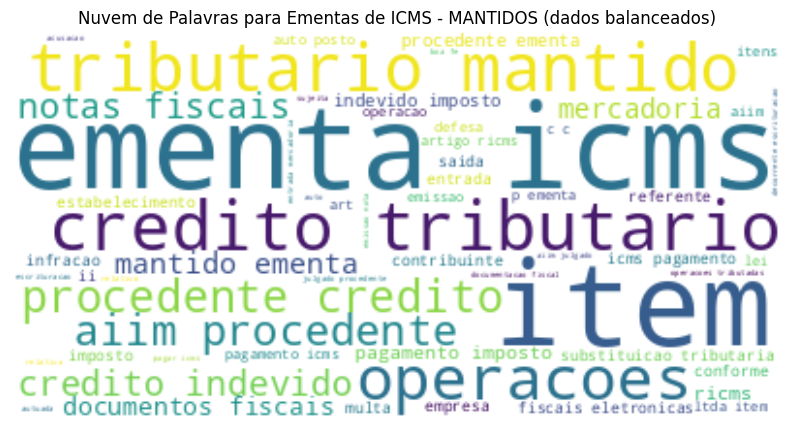

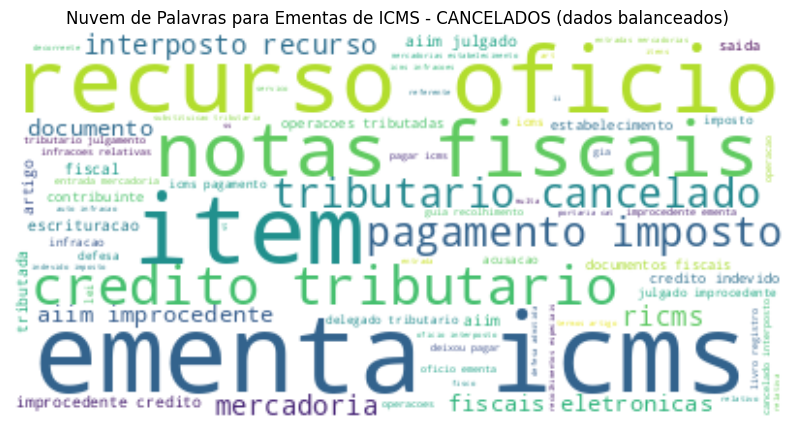

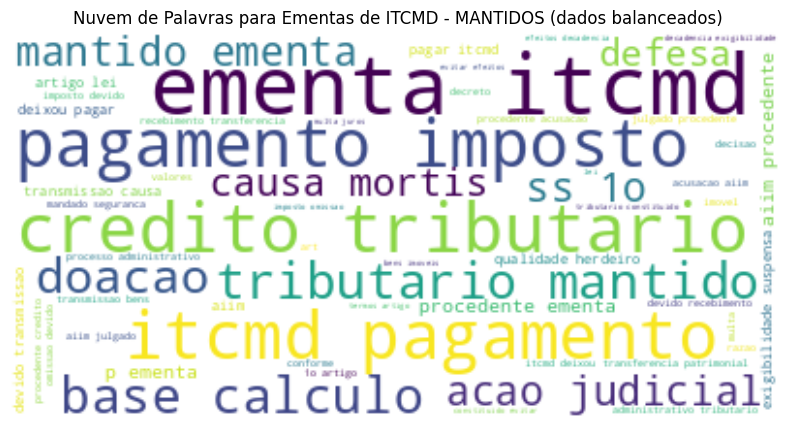

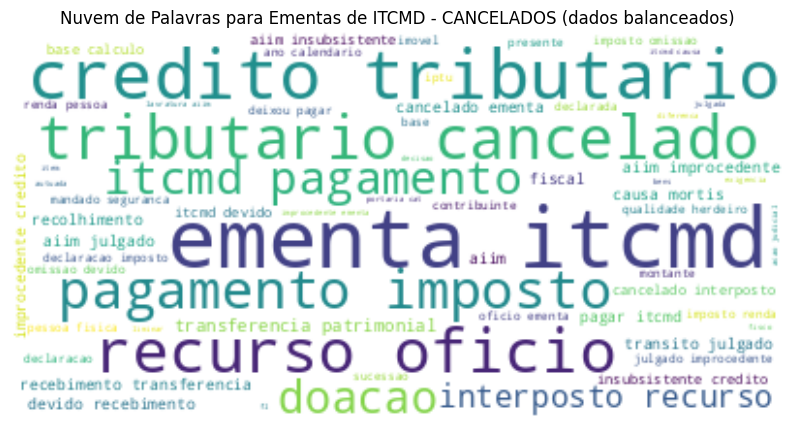

In [10]:
gera_wordcloud(df_ementas_balanc[(df_ementas_balanc['imposto'] == 'ICMS') & (df_ementas_balanc['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ICMS - MANTIDOS (dados balanceados)', lematizado=False)
gera_wordcloud(df_ementas_balanc[(df_ementas_balanc['imposto'] == 'ICMS') & (df_ementas_balanc['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ICMS - CANCELADOS (dados balanceados)', lematizado=False)
gera_wordcloud(df_ementas_balanc[(df_ementas_balanc['imposto'] == 'ITCMD') & (df_ementas_balanc['julgado'] == 'MANTIDO')],
               'Nuvem de Palavras para Ementas de ITCMD - MANTIDOS (dados balanceados)', lematizado=False)
gera_wordcloud(df_ementas_balanc[(df_ementas_balanc['imposto'] == 'ITCMD') & (df_ementas_balanc['julgado'] == 'CANCELADO')],
               'Nuvem de Palavras para Ementas de ITCMD - CANCELADOS (dados balanceados)', lematizado=False)

## 💡 Definição de variáveis preditoras adicionais
  - Já é possível, através da análise das nuvens de palavras, definir algumas variáveis preditoras. Destacam-se algumas palavras que podem ajudar ao aprendizado de máquina, conforme código a seguir (<i>dataframes</i> df_em_ml1 e df_em_ml1_b). São elas:
    - mercadoria -> tributo 'ICMS'
    - notas fiscais -> tributo 'ICMS'
    - credito indevido -> tributo 'ICMS'
    - operacoes -> tributo 'ICMS'
    - doação -> tributo 'ITCMD'
    - mantido -> julgamento 'MANTIDO'
    - procedente -> julgamento 'MANTIDO'
    - improcedente -> julgamento 'CANCELADO'
    - cancelado -> julgamento 'CANCELADO'
    - recurso -> julgamento 'CANCELADO'
  - Em 'rodada CRISP', inserimos também:
    - credito imposto -> tributo 'ICMS'
    - creditou -> tributo 'ICMS'
    - cupons fiscais -> tributo 'ICMS'
    - documentos fiscais -> tributo 'ICMS'
    - livro -> tributo 'ICMS'



In [11]:
# Criação do primeiro Dataframe de Ementas de Machine Learning (df_em_ml1), na versão normal e balanceada (_b)
df_em_ml1 = df_ementas[['julgado', 'imposto', 'ementa_no_sw_p_a', 'num_palavras', 'num_caracteres']].copy()
df_em_ml1_b = df_ementas_balanc[['julgado', 'imposto', 'ementa_no_sw_p_a', 'num_palavras', 'num_caracteres']].copy()
# Foram também inseridos os campos de testes das palavras chave acima descritas
palavras_chave = ['mercadoria', 'notas fiscais', 'credito indevido', 'operacoes',
                  'credito imposto', 'creditou', 'cupons fiscais', 'documentos fiscais', 'livro',
                  'doacao', 'mortis',
                  'mantido', 'procedente', 'improcedente', 'cancelado', 'recurso']
for palavra in palavras_chave:
    # atenção! Nas linhas abaixo foi inserido um espaço antes porque 'procedente' estava trazendo também 'improcedente'
    # Houve um ganho significativo de acurária na variável 'procedente', de 0,56 para 0,81
    # Quanto às demais preditoras, não se verificaram perdar ao se inserir espaço,
    #   exceto uma pequena diminuição de 'credito indevido' de 0,69 para 0,67
    df_em_ml1.loc[:, palavra] = df_ementas['ementa_no_sw_p_a'].str.contains(' ' + palavra)
    df_em_ml1_b.loc[:, palavra] = df_ementas_balanc['ementa_no_sw_p_a'].str.contains(' ' + palavra)

with pd.ExcelWriter(os.path.join(config['VAR_DIR'], 'df_em_ml1.xlsx')) as writer:
    df_em_ml1.to_excel(writer, sheet_name='df_em_ml1')
    df_em_ml1_b.to_excel(writer, sheet_name='df_em_ml1_b')
display(HTML("<h3>Também gerado, com sucesso, o arquivo excel 'df_em_ml1.xlsx' com os dataframes df_em_ml1 e df_em_ml1_b (balanceado)"
             + f" na pasta {config['VAR_DIR']}</h3>"))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ['num_palavras', 'num_caracteres'] + palavras_chave
X = df_em_ml1[features]
y_julgado = df_em_ml1['julgado']
y_imposto = df_em_ml1['imposto']

def ml_rf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Treinando um modelo de floresta aleatória para o target
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

display(HTML("<h2>Parte 1 - Dados Desbalanceados</h2>"))
display(HTML(f"<h3>Teste 1: RandomForest com a seguintes variáveis preditoras: <br>{features}<br>"
             + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado)*100)}%<br>"
             + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto)*100)}%</h3>"))

features2 = ['num_palavras', 'num_caracteres']
X = df_em_ml1[features2]
display(HTML(f"<h3>Teste 2: RandomForest com a seguintes variáveis preditoras: <br>{features2}<br>"
             + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado)*100)}%<br>"
             + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto)*100)}%</h3>"))

features = ['num_palavras', 'num_caracteres'] + palavras_chave
X = df_em_ml1_b[features]
y_julgado = df_em_ml1_b['julgado']
y_imposto = df_em_ml1_b['imposto']

display(HTML("<h2>Parte 2 - Dados Balanceados</h2>"))
display(HTML(f"<h3>Teste 1: RandomForest com a seguintes variáveis preditoras: <br>{features}<br>"
             + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado)*100)}%<br>"
             + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto)*100)}%</h3>"))

features2 = ['num_palavras', 'num_caracteres']
X = df_em_ml1_b[features2]
display(HTML(f"<h3>Teste 2: RandomForest com a seguintes variáveis preditoras: <br>{features2}<br>"
             + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado)*100)}%<br>"
             + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto)*100)}%</h3>"))


## 💡 Aprendizado de máquina (1)

Conforme se verifica acima:
  - As variáveis 'num_palavras' e 'num_caracteres' são muito pouco relevntes para a predição dos targets. Observa-se que na Parte 1 os valores de 91,02% e 83,67% não correspondem ao aprendizado de máquina, refletindo basicamente o desbalanceamento dos dados, que possuem muito mais 'julgado' = MANTIDO e imposto = 'ICMS'
  - Assim, necessária a continuação do aprendizado de máquina **apenas para dados balanceados**
  - Por fim, verificando o Teste 1 da Parte 2, temos que o simples teste (Verdadeiro ou Falso) das palavras  'mercadoria', 'notas fiscais', 'credito indevido', 'operacoes', 'credito imposto', 'creditou', 'cupons fiscais', 'documentos fiscais', 'livro', 'doacao' e 'mortis' auxilia no target 'imposto', enquanto 'mantido', 'procedente', 'improcedente', 'cancelado' e 'recurso' auxiliam na predição do target 'julgado', conforme também se verifica no código a seguir:

In [13]:
def ml1_pt3(df_em_ml1_b, features):
    X = df_em_ml1_b[features]
    y_julgado = df_em_ml1_b['julgado']
    y_imposto = df_em_ml1_b['imposto']
    display(HTML(f"<h3>Teste: RandomForest com a seguintes variáveis preditoras: <br>{features}<br>"
                 + f"Acurácia do target 'julgado': {two_dec_f(ml_rf(X, y_julgado)*100)}%<br>"
                 + f"Acurácia do target 'imposto': {two_dec_f(ml_rf(X, y_imposto)*100)}%</h3>"))

display(HTML("<h2>Parte 3a - Dados Balanceados - Testes com as variáveis preditores isoladamente</h2>"))
ml1_pt3(df_em_ml1_b, ['num_palavras'])
ml1_pt3(df_em_ml1_b, ['num_caracteres'])
ml1_pt3(df_em_ml1_b, ['mercadoria'])
ml1_pt3(df_em_ml1_b, ['notas fiscais'])
ml1_pt3(df_em_ml1_b, ['credito indevido'])
ml1_pt3(df_em_ml1_b, ['operacoes'])
ml1_pt3(df_em_ml1_b, ['doacao'])
ml1_pt3(df_em_ml1_b, ['mortis'])
ml1_pt3(df_em_ml1_b, ['credito imposto'])
ml1_pt3(df_em_ml1_b, ['creditou'])
ml1_pt3(df_em_ml1_b, ['cupons fiscais'])
ml1_pt3(df_em_ml1_b, ['documentos fiscais'])
ml1_pt3(df_em_ml1_b, ['livro'])
ml1_pt3(df_em_ml1_b, ['mantido'])
ml1_pt3(df_em_ml1_b, ['procedente'])
ml1_pt3(df_em_ml1_b, ['improcedente'])
ml1_pt3(df_em_ml1_b, ['cancelado'])
ml1_pt3(df_em_ml1_b, ['recurso'])

display(HTML("<h2>Parte 3b - Dados Balanceados - Testes com as variáveis preditores em conjunto, melhor score para 'julgado' e 'imposto'</h2>"))
ml1_pt3(df_em_ml1_b, ['mercadoria', 'notas fiscais', 'credito indevido', 'operacoes', 'doacao', 'mortis',
                      'credito imposto', 'creditou', 'cupons fiscais', 'documentos fiscais', 'livro'])
ml1_pt3(df_em_ml1_b, [ 'mantido', 'procedente', 'improcedente', 'cancelado', 'recurso'])


- Os últimos 5 testes da Parte 3a mostraram que as variáveis preditoras têm relevância para 'julgado', enquanto as demais mostram relevância para 'imposto'
- Os campos 'num_palavras' e 'num_caracteres' mostraram relevância quase inexistente em 'imposto' e muita pouca relevância em 'julgado'
- abaixo, é mostrada a árvore (<i>Random Forest</i>), de acordo com as variáveis relevante para cada target, conforme vários testes, cujo resultado final é a Parte 3b acima

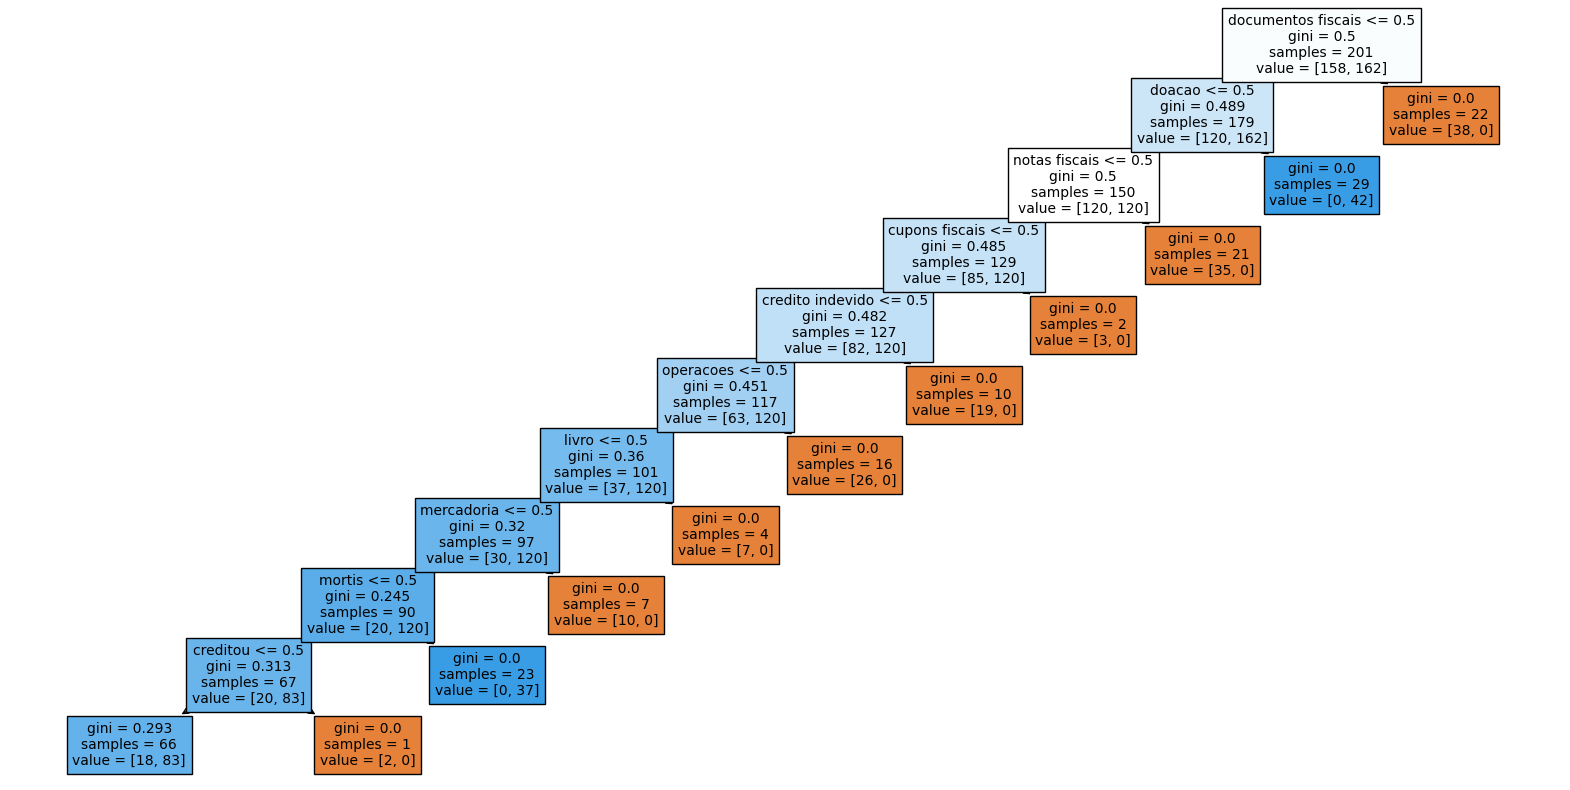

None

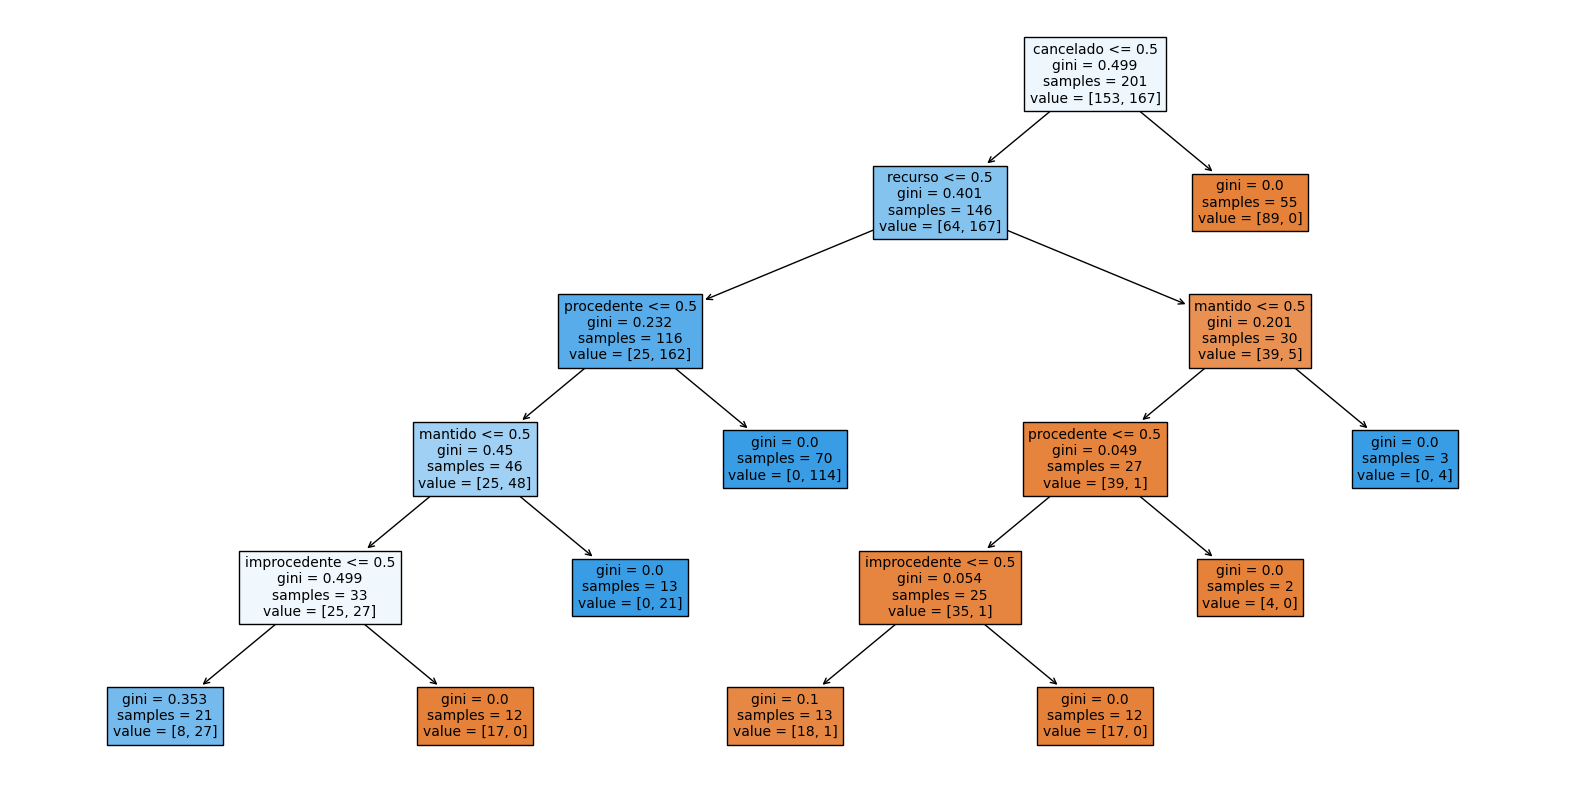

None

In [14]:
from sklearn.tree import plot_tree

def combina_dataframe_X_y(X_train, X_test, y_train, y_test, y_pred):
    # Criando as colunas 'origem'
    origem_train = pd.Series(['treino'] * X_train.shape[0], index=X_train.index)
    origem_test = pd.Series(['teste'] * X_test.shape[0], index=X_test.index)
    origem_combined = pd.concat([origem_train, origem_test])
    # Juntando os dados de treino e teste
    X_combined = pd.concat([X_train, X_test])
    y_combined = pd.concat([y_train, y_test])
    # Para o conjunto de teste, faça a previsão. Para o conjunto de treino, você já sabe que a predição é correta.
    y_pred_train = y_train.copy() # Para os dados de treino, considere a própria y_train como a "predição", já que foi usado para treinar
    y_pred_combined = pd.concat([y_pred_train, pd.Series(y_pred, index=y_test.index)])
    # Criando o dataframe com as colunas desejadas
    df_combined = X_combined.copy()
    df_combined.insert(0, 'origem', origem_combined)  # Insere a coluna 'origem' na primeira posição
    df_combined['y_real'] = y_combined
    df_combined['y_pred'] = y_pred_combined
    # 3. Criando a coluna 'status' comparando as predições com os valores reais
    df_combined['status'] = ['Acerto' if real == pred else 'Erro' for real, pred in zip(df_combined['y_real'], df_combined['y_pred'])]
    return df_combined

def plota_arvore_retorna_df_combinado(df, features, target):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tree = clf.estimators_[0]
    plt.figure(figsize=(20,10))
    plot_tree(tree, filled=True, feature_names=features, max_depth=10, fontsize=10)
    display(HTML(f"<h3>Árvore RandomForest - preditoras {features} - target {target} - Acurácia {two_dec_f(accuracy*100)}%</h3>"))
    display(plt.show())
    df_combinado = combina_dataframe_X_y(X_train, X_test, y_train, y_test, y_pred);
    return df_combinado

features = ['mercadoria', 'notas fiscais', 'credito indevido', 'operacoes', 'doacao', 'mortis',
            'credito imposto', 'creditou', 'cupons fiscais', 'documentos fiscais', 'livro']
df_combinado1 = plota_arvore_retorna_df_combinado(df_em_ml1_b, features, 'imposto')
df_combinado1 = df_combinado1.join(df_em_ml1_b['ementa_no_sw_p_a'])
features = ['mantido', 'procedente', 'cancelado', 'improcedente', 'recurso']
df_combinado2 = plota_arvore_retorna_df_combinado(df_em_ml1_b, features, 'julgado')
df_combinado2 = df_combinado2.join(df_em_ml1_b['ementa_no_sw_p_a'])

with pd.ExcelWriter(os.path.join(config['VAR_DIR'], 'df_em_ml1_rf.xlsx')) as writer:
    df_combinado1.to_excel(writer, sheet_name='df_combinado1')
    df_combinado2.to_excel(writer, sheet_name='df_combinado2')
display(HTML("<h3>Também gerado, com sucesso, o arquivo excel 'df_em_ml1_rf.xlsx' com os dataframes df_combinado1 e df_combinado2"
             + f" na pasta {config['VAR_DIR']}</h3>"))


## 💡 Aprendizado de máquina (2)

- Em 'rodadas <i>Crisp</i>', com a exportação do arquivo excel 'df_em_ml1_rf.xlsx', são facilmente verificáveis algumas causas de erros nas previsões, abrindo  e filtrando onde a coluna status = 'Erro'.
- Alguns exemplos da comparação dos dados de planilhas anteriormente geradas com as decisões em .pdf:
  - O <a href="https://www.pmarote.net/tcc/cweb/www/4126071voto4823385.pdf" target="_blank">AIIM 4.126.071-5</a> é na verdade parcialmente procedente e parcialmente improcedente, apesar de constar como <a href="https://www.pmarote.net/tcc/cweb/www/4126071.html" target="_blank">Julgamento: MANTIDO o AIIM</a> no movimento de 30/10/2019.
  - O <a href="https://www.pmarote.net/tcc/cweb/www/4126967voto4844234.pdf" target="_blank">AIIM 4.126.967-6</a> é na verdade parcialmente procedente, apesar de constar como <a href="https://www.pmarote.net/tcc/cweb/www/4126967.html" target="_blank">Julgamento: CANCELADO o AIIM</a> no movimento de 30/12/2020.
  - Alguns AIIMs são relativos a temas específicos, com amostra pequena ou até unitária, como <a href="https://www.pmarote.net/tcc/cweb/www/4122744voto4820478.pdf" target="_blank">4.122.744-0 (índices de energia elétrica)</a> e <a href="https://www.pmarote.net/tcc/cweb/www/4121973voto4822033.pdf" target="_blank">4.121.973-9 (transferência de crédito acumulado)</a>, o que dificulta a detecção por palavras chaves específicas, especialmente no âmbito de profundidade deste TCC
  - Em um desenvolvimento que também foge ao escopo deste TCC, seria possível criar novos tipos de detecção de termos, como por exemplo 'credito' que não seja 'credito tributario', porque 'crédito tributário' se refere a dois impostos, enquanto outros tipos de termos como 'credito imposto' ou 'credito indevido' são típicos de ICMS
- A seguir, com base nas variáveis preditoras (<i>features</i> e variáveis respostas (<i>targets</i>) acima, comparações entre vários algoritmos de classificação do scikit-learn:

## Parte 1: Target 'imposto'

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Importando os algoritmos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X = df_em_ml1_b[['mercadoria', 'notas fiscais', 'credito indevido', 'operacoes', 'doacao', 'mortis',
            'credito imposto', 'creditou', 'cupons fiscais', 'documentos fiscais', 'livro']]
y = df_em_ml1_b['imposto']

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista com os algoritmos a serem testados
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Comparando os algoritmos
results = {}
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[key] = accuracy
    print(key)
    print(classification_report(y_test, y_pred))
    print("-"*60)

# Exibindo o algoritmo com a maior acurácia
best_classifier = max(results, key=results.get)
print(f"Melhor classificador: {best_classifier} com acurácia de {results[best_classifier]*100:.2f}%")


Logistic Regression
              precision    recall  f1-score   support

        ICMS       1.00      0.88      0.93        40
       ITCMD       0.89      1.00      0.94        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

        ICMS       1.00      0.88      0.93        40
       ITCMD       0.89      1.00      0.94        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

------------------------------------------------------------
Gradient Boosting
              precision    recall  f1-score   support

        ICMS       1.00      0.75      0.86        40
       ITCMD       0.80      1.00      0.89        40

    accu

- Os vários algoritmos de classificação do scikit-learn deram resultados praticamente iguais, com um leve decréstimo em KNN
- A seguir, foram elaborados alguns estudos com base na Regressão Logística, cujos resultados coincidem com Floresta Aleatória

In [16]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
display(HTML(f"<h3>Acurácia do Modelo de Regressão Logística: {two_dec_f(accuracy_score(y_test, y_pred)*100)}%<h3>"))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ICMS       1.00      0.88      0.93        40
       ITCMD       0.89      1.00      0.94        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



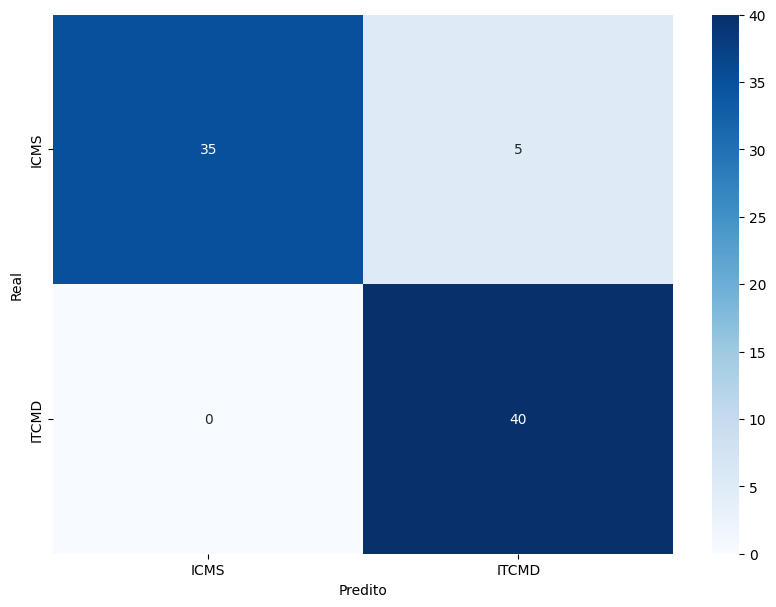

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
labels = ['ICMS', 'ITCMD']
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Real')
display(HTML(f'<h2>Matriz de Confusão</h2><h3>Observa-se que:<br>'
             + "- 35 (Verdadeiro Positivo para ICMS): O modelo previu corretamente que 35 observações são da classe 'ICMS'<br>"
             + "- 5 (Falso Negativo para ICMS): O modelo previu incorretamente que 5 observações são da classe 'ITCMD' quando na verdade são 'ICMS'<br>"
             + "- 0 (Falso Negativo para ITCMD): Não houve previsão incorreta da classe 'ITCMD'<br>"
             + "- 40 (Verdadeiro Positivo para ITCMD): O modelo previu corretamente que 40 observações são da classe 'ITCMD'<br>"
             + "</h3>"))
plt.show()


In [19]:
from IPython.display import display, HTML

# Configurando o pandas para não escapar strings HTML
pd.set_option('display.html.use_mathjax', False)

def gerar_link(numero):
    return f'<a href="https://www.fazenda.sp.gov.br/epat/extratoprocesso/ExtratoDetalhe.aspx?num_aiim={numero}" target="_blank">Visualizar AIIM {numero}</a>'

# Seu código para criar o DataFrame df_erro
df_erro = y_test.to_frame()
df_erro['y_pred'] = y_pred
df_erro['Link'] = df_erro.index.map(gerar_link)
df_erro = df_erro[df_erro['y_pred'] != df_erro['imposto']]

# Exibindo o DataFrame com links ativos
display(HTML("<h3>Lista de AIIMs com erro de predição do target 'imposto'</h3>" + df_erro.to_html(escape=False)))


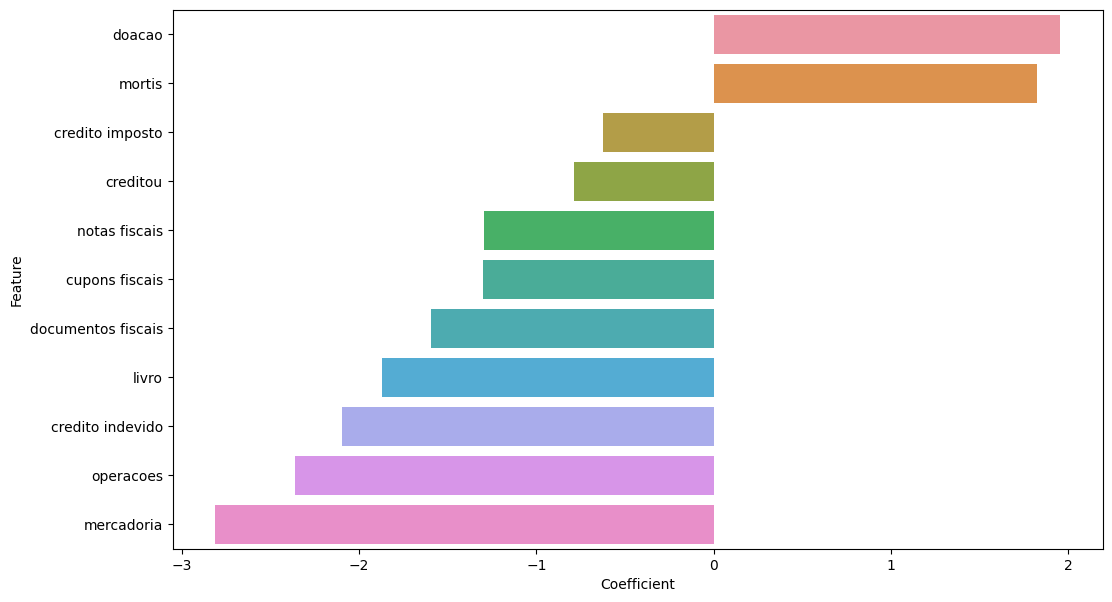

None

In [20]:
feature_names = X.columns
coefficients = lr_model.coef_[0]

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
display(HTML(f'<h2>Coeficientes da Regressão Logística</h2><h3>Observa-se que:<br>'
             + "- 'doacao' é variável preditora (feature) que mais influenciou para a variável de resposta 'imposto' = 'ITCMD'<br>"
             + "- 'mercadoria' é variável preditora (feature) que mais influenciou para a variável de resposta 'imposto' = 'ICMS'</h3>"))
display(plt.show())


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix


In [22]:
# Suponha que df é o dataframe 'df_em_ml1_b' fornecido
features = ['mercadoria', 'notas fiscais', 'credito indevido', 'operacoes', 'doacao', 'mortis',
            'credito imposto', 'creditou', 'cupons fiscais', 'documentos fiscais']

X = df_em_ml1_b[features].values
y = df_em_ml1_b['imposto'].values

# Codificar o target y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid para classificação binária

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.5336 - accuracy: 0.8594 - val_loss: 0.4042 - val_accuracy: 0.9250
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.9281 - val_loss: 0.2785 - val_accuracy: 0.9250
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9281 - val_loss: 0.2289 - val_accuracy: 0.9250
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2009 - accuracy: 0.9281 - val_loss: 0.2107 - val_accuracy: 0.9250
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1931 - accuracy: 0.9281 - val_loss: 0.2020 - val_accuracy: 0.9250
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.9281 - val_loss: 0.1982 - val_accuracy: 0.9250
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1817 - accuracy: 0.9281 - val_loss: 0.1957 - val_accuracy: 0.9250
Epoch 8/100


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

        ICMS       1.00      0.81      0.90        43
       ITCMD       0.82      1.00      0.90        37

    accuracy                           0.90        80
   macro avg       0.91      0.91      0.90        80
weighted avg       0.92      0.90      0.90        80

[[35  8]
 [ 0 37]]


Com a utilização de rede neural, verifica-se, acima, o mesmo resultado da matriz de confusão

## Parte 2: Target 'julgado'

In [25]:
X = df_em_ml1_b[['mantido', 'procedente', 'cancelado', 'improcedente', 'recurso']]
y = df_em_ml1_b['julgado']

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista com os algoritmos a serem testados
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Comparando os algoritmos
results = {}
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[key] = accuracy
    print(key)
    print(classification_report(y_test, y_pred))
    print("-"*60)

# Exibindo o algoritmo com a maior acurácia
best_classifier = max(results, key=results.get)
print(f"Melhor classificador: {best_classifier} com acurácia de {results[best_classifier]*100:.2f}%")


Logistic Regression
              precision    recall  f1-score   support

   CANCELADO       1.00      0.90      0.95        41
     MANTIDO       0.91      1.00      0.95        39

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

   CANCELADO       1.00      0.93      0.96        41
     MANTIDO       0.93      1.00      0.96        39

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80

------------------------------------------------------------
Gradient Boosting
              precision    recall  f1-score   support

   CANCELADO       1.00      0.93      0.96        41
     MANTIDO       0.93      1.00      0.96        39

    accu

In [26]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
display(HTML(f"<h3>Acurácia do Modelo de Regressão Logística: {two_dec_f(accuracy_score(y_test, y_pred)*100)}%<h3>"))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   CANCELADO       1.00      0.90      0.95        41
     MANTIDO       0.91      1.00      0.95        39

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



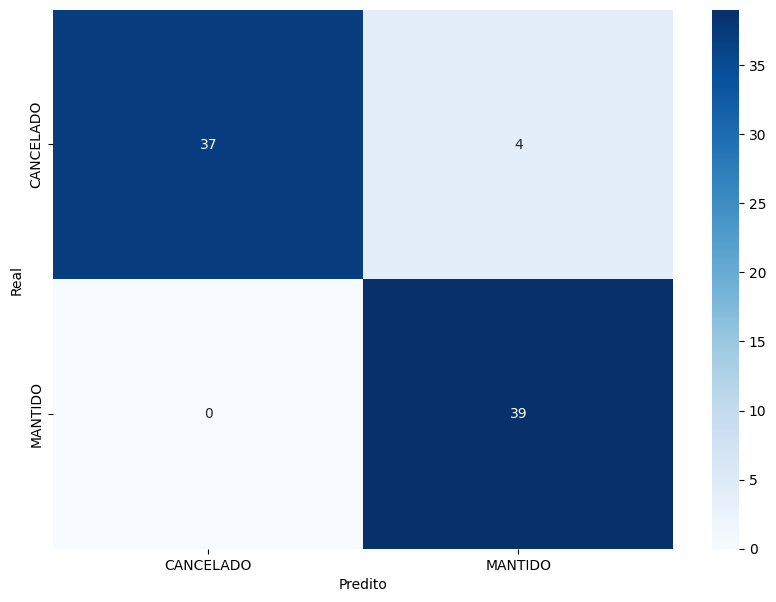

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
labels = ['CANCELADO', 'MANTIDO']
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Real')
display(HTML(f'<h2>Matriz de Confusão</h2>'))
plt.show()

In [28]:
# Configurando o pandas para não escapar strings HTML
pd.set_option('display.html.use_mathjax', False)

def gerar_link(numero):
    return f'<a href="https://www.fazenda.sp.gov.br/epat/extratoprocesso/ExtratoDetalhe.aspx?num_aiim={numero}" target="_blank">Visualizar AIIM {numero}</a>'

# Seu código para criar o DataFrame df_erro
df_erro = y_test.to_frame()
df_erro['y_pred'] = y_pred
df_erro['Link'] = df_erro.index.map(gerar_link)
df_erro = df_erro[df_erro['y_pred'] != df_erro['julgado']]

# Exibindo o DataFrame com links ativos
display(HTML("<h3>Lista de AIIMs com erro de predição do target 'julgado'</h3>" + df_erro.to_html(escape=False)))

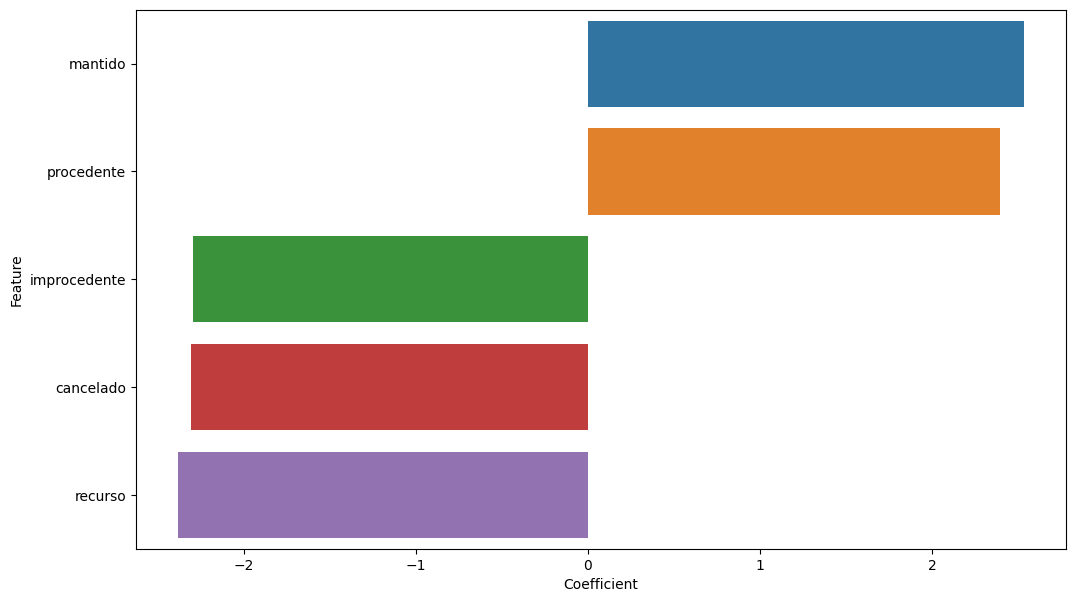

None

In [29]:
feature_names = X.columns
coefficients = lr_model.coef_[0]

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
display(HTML(f'<h2>Coeficientes da Regressão Logística</h2><h3>Observa-se que:<br>'
             + "- 'mantido' é variável preditora (feature) que mais influenciou para a variável de resposta 'julgado' = 'MANTIDO'<br>"
             + "- 'recurso' é variável preditora (feature) que mais influenciou para a variável de resposta 'julgado' = 'CANCELADO'</h3>"))
display(plt.show())

## Aprendizado de máquina com sentenças, ao invés da ementas, usando redes neurais
  - O aprendizado de máquina acima foi efetuado com base nas ementas extraídas das sentenças
  - Em razão das potencialidades das redes neurais, foi possível efetuar o aprendizado de máquina com as sentenças integrais, conforme código a seguir

In [30]:
import os
import glob
import re

def get_decis_aiim(aiim):
    """
    Busca um arquivo .txt na pasta /content/var/txt cujo nome começa com os primeiros 7 caracteres de aiim e retorna seu conteúdo em uma string.
    """
    search_pattern = os.path.join('/content/var/txt', f'{aiim:07d}*.txt')
    matching_files = glob.glob(search_pattern)
    if not matching_files:
        raise FileNotFoundError(f'Nenhum arquivo encontrado com o padrão: {search_pattern}')
    # Se houver mais de um arquivo correspondente, isso pega o primeiro.
    file_path = matching_files[0]
    with open(file_path, 'r') as f:
        return f.read()

def get_decis_aiim_no_sw_p(aiim):
    texto = get_decis_aiim(aiim)
    texto = remove_stop_words_pontuacao(texto)
    #texto = lematiza_texto(texto)    // não será necessário no sentence-transformers
    #texto = remove_acentuacao(texto) // não será necessário no sentence-transformers
    # retirando mudança de linha
    texto = texto.replace('\n', ' ').replace('\r', ' ')
    # retirando mais que um espaço
    texto = re.sub(' +', ' ', texto)
    # Substituir todos os caracteres de controle ASCII por uma string vazia
    texto = re.sub('[\x00-\x1F]', ' ', texto)
    return texto

print(get_decis_aiim_no_sw_p(4118485))

governo paulo secretaria fazenda planejamento delegacia tributária julgamento paulo unidade julgamento osasco aiim nº 4.118. 485-3 autuado ie volkswagen brasil indústria veículos automotores ltda cnpj cpf localidade 688.027.786.114 59.104.422/ 0024-46 taubaté solidário(s ): ie cnpj cpf fase julgamento julgador localidade defesa milena oliveira moreira ementa icms – item i.1 pagamento icms item ii.3 creditamento indevido item iii.4 cancelamento nfe ’s itens iv.5 iv.6 escrituração notas fiscais entradas item iv.7 escrituração notas fiscais saídas relativas operações tributadas itens objeto confissão irretratável termos artigo 85-b lei n ° 6.374/89 contribuinte informou efetuado recolhimento débitos fiscais correspondentes itens fls 1033 d. núcleo fiscal cobrança certificou recolhimento efetuado informou débitos fiscais correspondentes itens integralmente liquidados item ii.2 creditamento indevido icms relativo aquisição bens destinados ativo permanente transcorrido prazo estabelecido art

In [31]:
# Esse código copia as três primeiras colunas de df_ementas_balanc para o novo DataFrame df_decisoes_balanc.
# Então, para cada valor na coluna 'numero', ele aplica a função get_decis_aiim_no_sw_p e armazena o resultado na nova coluna 'decisao_no_sw_p'
# _no_sw_p significa que foram retirados os 'stop words' e também a pontuação

df_decisoes_balanc = pd.DataFrame()
# Copiando as colunas 'numero', 'julgado', 'imposto' do df_ementas_balanc para o df_decisoes_balanc
# Copiando o índice 'numero' e as colunas 'julgado', 'imposto' do df_ementas_balanc para o df_decisoes_balanc
df_decisoes_balanc['numero'] = df_ementas_balanc.index
df_decisoes_balanc.set_index('numero', inplace=True)
df_decisoes_balanc['julgado'] = df_ementas_balanc['julgado']
df_decisoes_balanc['imposto'] = df_ementas_balanc['imposto']
# Aplicando a função get_decis_aiim_no_sw_p para cada valor na coluna 'numero' e armazenando o resultado na coluna 'decisao_no_sw_p'
df_decisoes_balanc['decisao_no_sw_p'] = df_decisoes_balanc.index.map(get_decis_aiim_no_sw_p)

df_decisoes_balanc

julgado imposto                                    decisao_no_sw_p
numero                                                                       
4118801  CANCELADO   ITCMD  governo paulo secretaria fazenda planejamento ...
4118996    MANTIDO   ITCMD  governo paulo secretaria fazenda delegacia tri...
4118286  CANCELADO   ITCMD  governo paulo secretaria fazenda planejamento ...
4125819    MANTIDO    ICMS  governo paulo secretaria fazenda planejamento ...
4123887  CANCELADO   ITCMD  governo paulo secretaria fazenda planejamento ...
...            ...     ...                                                ...
4119230    MANTIDO   ITCMD  governo paulo secretaria fazenda planejamento ...
4125612  CANCELADO    ICMS  governo paulo secretaria fazenda planejamento ...
4118015    MANTIDO   ITCMD  governo paulo secretaria fazenda planejamento ...
4129982    MANTIDO   ITCMD  governo paulo secretaria fazenda planejamento ...
4124794  CANCELADO   ITCMD  governo paulo secretaria fazenda planejamento ...

[400 rows x 3 columns]

In [32]:
# prompt: exporte o dataframe df_decisoes_balanc para excel dentro da pasta var usando config['VAR_DIR']
df_decisoes_balanc.to_excel(os.path.join(config['VAR_DIR'], 'df_decisoes_balanc.xlsx'))


In [33]:
df_decisoes_balanc.julgado.value_counts()

CANCELADO    200
MANTIDO      200
Name: julgado, dtype: int64

In [34]:
df_decisoes_balanc.imposto.value_counts()

ITCMD    200
ICMS     200
Name: imposto, dtype: int64

In [35]:
# obter numero de palavras nos dados
num_words = df_decisoes_balanc.decisao_no_sw_p.apply(lambda x: len(str(x).split()))
max_length = num_words.max()
percentile_75 = num_words.quantile(0.75)
percentile_95 = num_words.quantile(0.95)

print(f"percentil 75: {percentile_75}")
print(f"percentil 95: {percentile_95}")
print(f"Maximo: {max_length}")

percentil 75: 2727.5
percentil 95: 5719.549999999997
Maximo: 13731


In [36]:
%%capture
!pip install sentence-transformers

In [37]:
from sentence_transformers import SentenceTransformer
#model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
model

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: XLMRobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [38]:
from sklearn.model_selection import train_test_split

#X = list(df_decisoes_balanc['decisao_no_sw_p_encoded'])
X = df_decisoes_balanc['decisao_no_sw_p'].to_list()
y_julgado = np.array((df_decisoes_balanc.julgado == 'MANTIDO').astype(int))
#y_julgado = df_decisoes_balanc['julgado']
y_imposto = np.array((df_decisoes_balanc.imposto == 'ICMS').astype(int))
#y_imposto = df_decisoes_balanc['imposto']

X_train_julgado, X_test_julgado, y_train_julgado, y_test_julgado = train_test_split(X, y_julgado, test_size=0.2, random_state=42)
X_train_imposto, X_test_imposto, y_train_imposto, y_test_imposto = train_test_split(X, y_imposto, test_size=0.2, random_state=42)

print(f"Tamanho de X_train_julgado: {len(X_train_julgado)}")
print(f"Tamanho de y_train_julgado: {len(y_train_julgado)}")
print(f"Tamanho de X_train_imposto: {len(X_train_imposto)}")
print(f"Tamanho de y_train_imposto: {len(y_train_imposto)}")


Tamanho de X_train_julgado: 320
Tamanho de y_train_julgado: 320
Tamanho de X_train_imposto: 320
Tamanho de y_train_imposto: 320


In [39]:
y_julgado

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,

In [40]:
y_imposto

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,

In [41]:
embeddings_train_julgado = model.encode(X_train_julgado, batch_size=10, show_progress_bar=True)
embeddings_test_julgado = model.encode(X_test_julgado, batch_size=10, show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

In [42]:
import tensorflow as tf

# Assumindo que você já tem X_train_julgado e y_train_julgado
num_classes_julgado = len(set(y_train_julgado))

model = tf.keras.Sequential([
#    tf.keras.layers.Dense(512, activation='relu', input_shape=(len(X_train_julgado[0]),)),
    tf.keras.layers.Input(shape=(embeddings_train_julgado.shape[1],)),  # entrada, utilizando como entrada os embeddings
    tf.keras.layers.BatchNormalization(),                          # normalização em batch
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes_julgado, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(embeddings_train_julgado, y_train_julgado, epochs=15, batch_size=32)

Epoch 1/15
10/10 [==============================] - 1s 7ms/step - loss: 0.8353 - accuracy: 0.5281
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.7250
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: 0.3961 - accuracy: 0.8281
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 0.3436 - accuracy: 0.8500
Epoch 5/15
10/10 [==============================] - 0s 9ms/step - loss: 0.2745 - accuracy: 0.9094
Epoch 6/15
10/10 [==============================] - 0s 10ms/step - loss: 0.2411 - accuracy: 0.9187
Epoch 7/15
10/10 [==============================] - 0s 11ms/step - loss: 0.2094 - accuracy: 0.9438
Epoch 8/15
10/10 [==============================] - 0s 12ms/step - loss: 0.1843 - accuracy: 0.9531
Epoch 9/15
10/10 [==============================] - 0s 11ms/step - loss: 0.1716 - accuracy: 0.9563
Epoch 10/15
10/10 [==============================] - 0s 10ms/step - loss: 0.1361 - accuracy: 0.9625
Epoch 11/15
10

In [45]:
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
embeddings_train_imposto = model.encode(X_train_imposto, batch_size=10, show_progress_bar=True)
embeddings_test_imposto = model.encode(X_test_imposto, batch_size=10, show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

In [46]:
import tensorflow as tf

model_i = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(embeddings_train_imposto.shape[1],)),  # entrada, utilizando como entrada os embeddings
    tf.keras.layers.BatchNormalization(),                          # normalização em batch
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(set(y_train_imposto)), activation='softmax')
])

model_i.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model_i.fit(embeddings_train_imposto, y_train_imposto, epochs=15, batch_size=32)

Epoch 1/15
10/10 [==============================] - 1s 7ms/step - loss: 0.2311 - accuracy: 0.9094
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 0.0430 - accuracy: 0.9875
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 4/15
10/10 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 0.9937
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 0.0126 - accuracy: 0.9969
Epoch 6/15
10/10 [==============================] - 0s 8ms/step - loss: 0.0200 - accuracy: 0.9906
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: 0.0296 - accuracy: 0.9875
Epoch 8/15
10/10 [==============================] - 0s 8ms/step - loss: 0.0104 - accuracy: 0.9969
Epoch 9/15
10/10 [==============================] - 0s 7ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 10/15
10/10 [==============================] - 0s 6ms/step - loss: 0.0148 - accuracy: 0.9937
Epoch 11/15
10/10 [

In [44]:
# matriz de confusão dos dados de teste para a variável resposta 'julgado'

y_pred = model.predict(embeddings_test_julgado)
y_pred = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_test_julgado, y_pred))


3/3 [==============================] - 1s 14ms/step
[[21 20]
 [ 7 32]]


- Observa-se, conforme célula acima, que a matriz de confusão através da utilização de redes neurais com as sentenças em sua integralidade, para a variável resposta 'imposto', gerou uma matriz de confusão muito semelhante, ou seja, confirmando a efetividade dos resultados de todos os algoritmos utilizados neste trabalho

In [48]:
# matriz de confusão dos dados de teste para a variável resposta 'imposto'

y_pred_i = model_i.predict(embeddings_test_imposto)
y_pred_i = np.argmax(y_pred_i, axis=1)
print(confusion_matrix(y_test_imposto, y_pred_i))


3/3 [==============================] - 0s 12ms/step
[[40  0]
 [ 3 37]]


- Observa-se, conforme célula acima, que a matriz de confusão através da utilização de redes neurais com as sentenças em sua integralidade, para a veriável resposta 'julgado', gerou uma matriz de confusão com acurácia inferior
- a explicação da redução da acurácia na análise desta variável resposta está no fato de que há muito mais elementos na sentença que indicam o tipo de imposto do que a quantidade de elementos que indicam o tipo de julgado, cuja expressão final encontra-se normalmente somente no último parágrafo